Implementacion de Berstein Vazirani.



In [ ]:
!pip uninstall qiskit -y
!pip uninstall qiskit-aer -y


In [ ]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
# Cambia esta línea:
# from qiskit import Aer  # <-- ESTO ES LO QUE ESTÁ CAUSANDO EL ERROR
from qiskit_aer import Aer # <-- AHORA IMPORTA Aer DESDE qiskit_aer
from qiskit.visualization import plot_histogram

Librerías importadas correctamente.

Circuito de Bernstein-Vazirani:
     ┌───┐      ░ ┌───────────────┐ ░ ┌───┐┌─┐            
q_0: ┤ H ├──────░─┤0              ├─░─┤ H ├┤M├────────────
     ├───┤      ░ │               │ ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├──────░─┤1              ├─░─┤ H ├─╫─┤M├─────────
     ├───┤      ░ │               │ ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├──────░─┤2              ├─░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░ │  Oracle_10001 │ ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░─┤3              ├─░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░ │               │ ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░─┤4              ├─░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ │               │ ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├─░─┤5              ├─░───────╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───────────────┘ ░       ║  ║  ║  ║  ║ 
c: 5/═══════════════════════════════════════╩══╩══╩══╩══╩═
                                            0  1  2  3  4 

Resultados de la simulación: {'10001': 1}
Cad

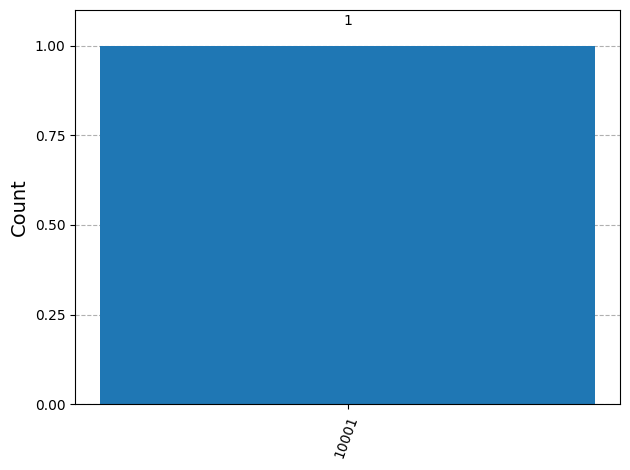

In [ ]:
# Paso 1: (Opcional) Desinstalar versiones previas para una instalación limpia
# Ejecuta estas líneas si quieres asegurarte de que no haya conflictos
# !pip uninstall qiskit -y
# !pip uninstall qiskit-aer -y

# Paso 2: Instalar Qiskit y qiskit-aer
!pip install qiskit
!pip install qiskit-aer

# Paso 3: Importar las librerías (con la corrección para Aer)
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Importa Aer desde qiskit_aer
from qiskit.visualization import plot_histogram

print("Librerías importadas correctamente.")

# A partir de aquí, puedes pegar el resto de tu código de Bernstein-Vazirani
# que definiste en la respuesta anterior. Por ejemplo:

# --- Inicio del código del algoritmo de Bernstein-Vazirani ---

def create_oracle(num_qubits, secret_string):
    qc_oracle = QuantumCircuit(num_qubits + 1)
    s_list = [int(bit) for bit in secret_string]
    for i in range(num_qubits):
        if s_list[i] == 1:
            qc_oracle.cx(i, num_qubits)
    return qc_oracle.to_gate(label=f"Oracle_{secret_string}")

def run_bernstein_vazirani(secret_string):
    num_qubits = len(secret_string)
    total_qubits = num_qubits + 1
    qc = QuantumCircuit(total_qubits, num_qubits)
    qc.x(num_qubits)
    qc.h(range(total_qubits))
    qc.barrier()
    oracle = create_oracle(num_qubits, secret_string)
    qc.append(oracle, range(total_qubits))
    qc.barrier()
    qc.h(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    return qc

# Define tu cadena secreta (ejemplo: "1101")
my_secret_string = "10001"

# Ejecuta el circuito
bv_circuit = run_bernstein_vazirani(my_secret_string)

# Dibuja el circuito para visualizarlo
print("\nCircuito de Bernstein-Vazirani:")
print(bv_circuit)

# Usa el simulador Aer (ahora importado correctamente)
simulator = Aer.get_backend('qasm_simulator')

# Transpila el circuito para optimizarlo para el simulador
compiled_circuit = transpile(bv_circuit, simulator)

# Ejecuta el circuito en el simulador
job = simulator.run(compiled_circuit, shots=1)

# Obtiene los resultados
result = job.result()
counts = result.get_counts(compiled_circuit)

print(f"\nResultados de la simulación: {counts}")

measured_secret = list(counts.keys())[0]
reversed_measured_secret = measured_secret[::-1]

print(f"Cadena secreta esperada: {my_secret_string}")
print(f"Cadena secreta encontrada: {reversed_measured_secret}")

if my_secret_string == reversed_measured_secret:
    print("¡El algoritmo de Bernstein-Vazirani encontró la cadena secreta correctamente!")
else:
    print("Hubo un error o la cadena secreta no coincide.")

# Puedes visualizar el histograma de los resultados
plot_histogram(counts)